In [1]:
using Seismic, PyPlot # required deps

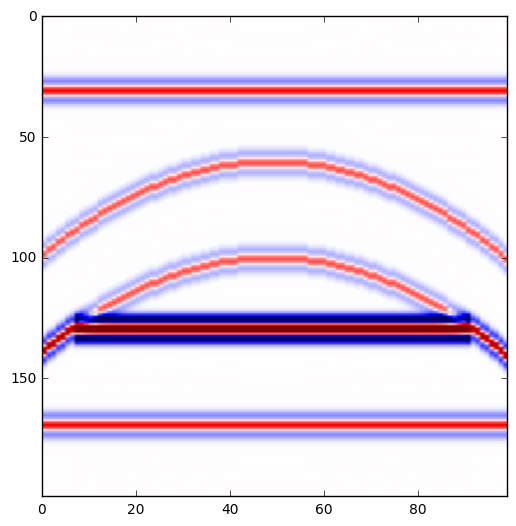

PyObject <matplotlib.image.AxesImage object at 0x7f70c9909050>

In [2]:
# First let's view an inline out of the "real" seismic data:

seismic, seismic_h = SeisRead("../dat/image_correct"); # load data
SeisPlot(seismic[:,:,50], cmap = "seismic")     # plot data

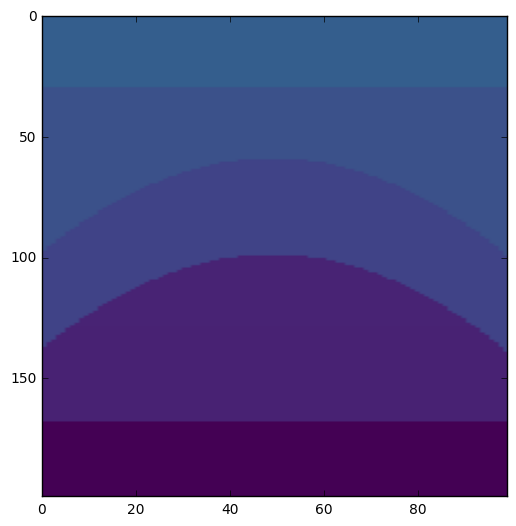

PyObject <matplotlib.image.AxesImage object at 0x7f70c5bc1cd0>

In [3]:
# Then let's assume we've picked a velocity model
# and converted it to interval velocities.
# We'll assume there are interpretive errors in
# the model.

# An inline from our picked vel model looks like this:

vel_initial, vel_h = SeisRead("../dat/vel_incorrect"); # read data
SeisPlot(vel_initial[:,:,50], cmap = "viridis_r")           # plot data

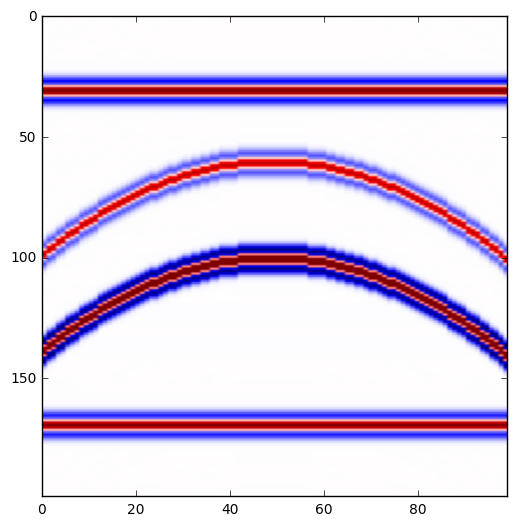

PyObject <matplotlib.image.AxesImage object at 0x7efc5777c050>

In [2]:
# Obviously, this model is incorrect. Hypothetically the 
# geophysicist who picked this section was afraid to pick
# the velocity inversion. Let's forward model this 
# incorrect vel model and view the output modeled seismic:

include("../mod/modeler.jl");                                   # prep deps
modeler("../dat/vel_incorrect","../dat/image_incorrect")        # model seismic from our bad vels
seis_incorrect, seismic_h = SeisRead("../dat/image_incorrect"); # load data
SeisPlot(seis_incorrect[:,:,50], cmap = "seismic")              # plot data


3D Poststack full waveform inversion algorithm


In this program FWI updates a velocity model one sample at a time,
one trace at a time. The velocity sample is perturbed positively,
negatively, and not at all. Then the algorithm models new seismic
from all three of the perturbed velocity models, and compares them to
the input (real) seismic data. Whichever perturbation generates the
least amount of error is chosen to be correct, and input into the 
updated velocity model.
This algorithm accepts six inputs in the following order:

	1. Initial velocity model
	2. Poststack 3D seismic volume in Seis format
	3. One dimensional wavelet in Seis format
	4. Output file name (updated vel model in Seis format)
	5. Velocity update increment percentage in decimal
	6. Maximum number of velocity update iterations
	7. Verbosity (see note)

If verbose is 0 operation is silent. If verbose is 1 updates will
print to stdout. If verbose is 2 debugging info will print to stdout.
Here is an example to get y

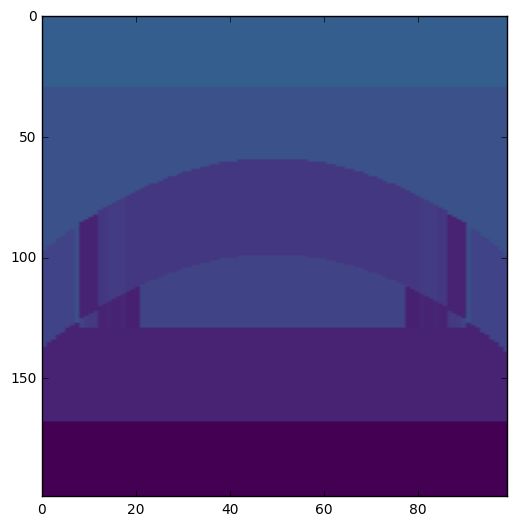

elapsed time: 631.448819501 seconds


PyObject <matplotlib.image.AxesImage object at 0x7fdf4f1e2b10>

In [22]:
# Therefore, if we tried to interpret on our bad velocity 
# model, we would never find our drilling target. Hence
# we need to improve our velocity model somehow. So let's
# use full waveform inversion.

# Let's input our poorly picked velocity model and the 
# seismic data into an FWI algorithm and take a look
# at the updated velocity model to see if there was any
# improvement:

# NOTE: running this may take 10 minutes or more...

tic()                                               # start timer
include("../fwi/fwi.jl")                            # prep deps
fwi("../dat/vel_incorrect", "../dat/image_correct", 
"../dat/wav", "../dat/updated_vel", .03, 10, 0);     # FWI algorithm
toc()                                               # end timer + print

vel_updated, vel_h = SeisRead("../dat/updated_vel") # load data
SeisPlot(vel_updated[:,:,50], cmap = "viridis_r")   # plot data

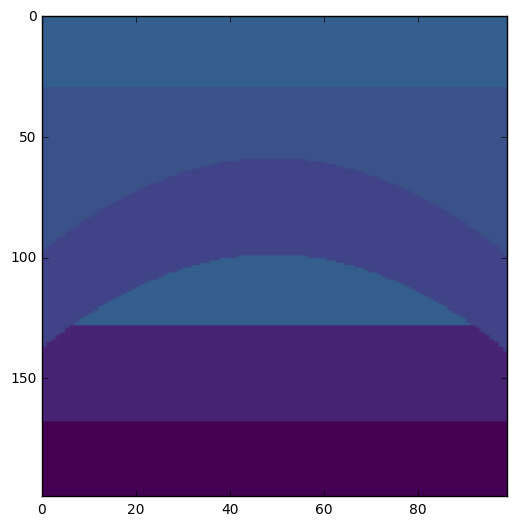

PyObject <matplotlib.image.AxesImage object at 0x7fdf4e162dd0>

In [7]:
# We can see here that the vel model has been improved considerably
# by full waveform inversion. Though the edges of the reservoir
# are smeared (because the wavelet envelope comparison algorithm
# isn't sophisticated enough to handle tuning), you are clearly 
# able to delinate where the reservoir is. 

# For comparison, let's view the insitu velocities.
# (This is the model the author used to create the "real" seismic)


vel_true, vel_h = SeisRead("../dat/vel_correct"); # read data
SeisPlot(vel_true[:,:,50], cmap = "viridis_r")        # plot data

In [7]:
# As you can see, the FWI updated vel model is much closer
# to the true velocity model.